In [60]:
#import all these module 
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import time
from uofgsocsai import *
from more_itertools import chunked
from IPython.display import clear_output

In [61]:
# Setup the parameters for the specific problem (you can change all of these if you want to) 
problem_id = 6    # problem_id \in [0:7] generates 8 diffrent problems on which you can train/fine-tune your agent 
reward_hole = 0     # should be less than or equal to 0.0 (you can fine tune this  depending on you RL agent choice)
is_stochastic = True  # should be False for A-star (deterministic search) and True for the RL agent

# Generate the specific problem 
env = LochLomondEnv(problem_id=problem_id, is_stochastic=True,   reward_hole=reward_hole)

# Let's visualize the problem/env
print(env.desc)

[[b'H' b'S' b'S' b'S' b'F' b'H' b'S' b'S']
 [b'F' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'H' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'H' b'H' b'F' b'F' b'F' b'H' b'F']
 [b'F' b'H' b'F' b'F' b'H' b'F' b'H' b'F']
 [b'G' b'F' b'G' b'H' b'F' b'G' b'F' b'G']]


In [62]:
#create Q-table
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
#print(q_table)
print(action_space_size)
print(state_space_size)

4
64


In [63]:
#initialize parameters
max_episodes = 20000
max_iter_per_episode = 199
learning_rate = 0.78
gamma = 0.95

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005

In [64]:
rewards = []
episode_step = []

for episode in range(max_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
#choose action   
    for step in range(max_iter_per_episode):
        exp_exp_tradeoff = random.uniform(0, 1)
        
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)
        
#update Q table        
        q_table[state, action] = q_table[state, action] + learning_rate * (reward + gamma*np.max(q_table[new_state, :]) - q_table[state,action])
    
        total_rewards += reward        
        state = new_state
        
       
        if done == True:
            break
            
#update epsilon        
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)
    episode_step.append(step)
    
print("Score over time: " +  str(sum(rewards)/max_episodes))

#print(q_table)

#calculating & printing the average reward per thousand episodes
average_rewards =[sum(x) / len(x) for x in chunked(rewards, 100)]
print("********Average rewards per 100 episodes********\n")
print(average_rewards)


Score over time: 0.48685
********Average rewards per 100 episodes********

[0.03, 0.03, 0.02, 0.0, 0.1, 0.1, 0.25, 0.15, 0.38, 0.38, 0.39, 0.6, 0.45, 0.5, 0.46, 0.38, 0.49, 0.51, 0.58, 0.5, 0.58, 0.52, 0.53, 0.56, 0.3, 0.42, 0.44, 0.54, 0.56, 0.66, 0.53, 0.56, 0.47, 0.62, 0.5, 0.51, 0.65, 0.33, 0.46, 0.44, 0.63, 0.41, 0.43, 0.45, 0.41, 0.51, 0.48, 0.51, 0.29, 0.58, 0.51, 0.61, 0.41, 0.47, 0.47, 0.56, 0.41, 0.49, 0.56, 0.59, 0.38, 0.59, 0.48, 0.5, 0.49, 0.58, 0.58, 0.6, 0.64, 0.53, 0.47, 0.49, 0.48, 0.48, 0.47, 0.54, 0.38, 0.39, 0.52, 0.51, 0.38, 0.67, 0.5, 0.43, 0.4, 0.5, 0.38, 0.44, 0.39, 0.43, 0.54, 0.54, 0.44, 0.43, 0.5, 0.54, 0.66, 0.56, 0.39, 0.4, 0.46, 0.41, 0.33, 0.41, 0.3, 0.6, 0.6, 0.44, 0.49, 0.5, 0.52, 0.51, 0.47, 0.57, 0.45, 0.52, 0.53, 0.45, 0.65, 0.6, 0.5, 0.68, 0.54, 0.49, 0.52, 0.57, 0.57, 0.67, 0.48, 0.48, 0.5, 0.53, 0.43, 0.47, 0.58, 0.5, 0.61, 0.56, 0.47, 0.49, 0.44, 0.56, 0.43, 0.39, 0.42, 0.36, 0.55, 0.53, 0.57, 0.65, 0.51, 0.59, 0.54, 0.64, 0.57, 0.52, 0.58, 0.5, 

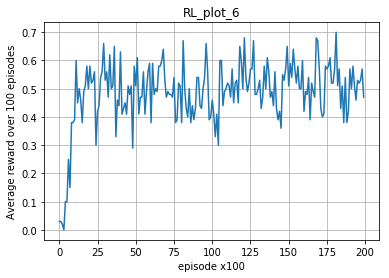

In [65]:
imgname = "RL_plot_"+str(problem_id)
#set name of x,y
plt.title(imgname)
plt.grid()
plt.xlabel("episode x100")
plt.ylabel('Average reward over 100 episodes')
#plt.savefig(imgname)
plt.plot(average_rewards)
plt.show()